In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

In [2]:
print(os.listdir("dataset"))
#from subprocess import check_output
#print(check_output(["ls", "dataset"]).decode("utf8"))

['Test', 'Training']


In [3]:
directory = "dataset/Training/"
classes=["Apel_Fuji", "Jeruk_Mandarin", "Pear_Century"]

all_arrays=[]
img_size_width=224
img_size_height=224
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array=cv2.resize(img_array,(img_size_height,img_size_width))
        all_arrays.append([img_array,class_num])

In [4]:
directory2 = "dataset/Test/"
classes2=["Apel_Fuji", "Jeruk_Mandarin", "Pear_Century"]

all_arrays2=[]
img_size_width=224
img_size_height=224
for i in classes2:
    path=os.path.join(directory2,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        img_array2=cv2.resize(img_array2,(img_size_height,img_size_width))
        all_arrays2.append([img_array2,class_num])

## Mengambil contoh data

In [5]:
all_arrays

[[array([[[202, 193, 162],
          [177, 180, 143],
          [121, 144, 102],
          ...,
          [229, 231, 226],
          [236, 238, 233],
          [239, 241, 236]],
  
         [[221, 215, 187],
          [194, 193, 162],
          [159, 175, 136],
          ...,
          [227, 228, 223],
          [229, 230, 225],
          [230, 231, 226]],
  
         [[222, 217, 196],
          [204, 200, 174],
          [177, 187, 153],
          ...,
          [222, 224, 219],
          [226, 227, 222],
          [226, 227, 222]],
  
         ...,
  
         [[ 73,  47,  34],
          [ 73,  45,  33],
          [ 81,  53,  41],
          ...,
          [ 33,  66,  37],
          [ 37,  67,  38],
          [ 44,  72,  42]],
  
         [[ 63,  40,  26],
          [ 72,  44,  32],
          [ 76,  48,  36],
          ...,
          [ 31,  66,  34],
          [ 34,  67,  36],
          [ 40,  71,  39]],
  
         [[ 97,  71,  56],
          [ 84,  58,  45],
          [ 78,  50,  38

In [5]:
apelfuji_indices = [index for index, (_, class_num) in enumerate(all_arrays) if class_num == classes.index("Apel_Fuji")]
Jeruk_Mandarin_indices = [index for index, (_, class_num) in enumerate(all_arrays) if class_num == classes.index("Jeruk_Mandarin")]
Pear_Century_indices = [index for index, (_, class_num) in enumerate(all_arrays) if class_num == classes.index("Pear_Century")]

In [6]:
#apelfuji_indices
Jeruk_Mandarin_indices
#Pear_Century_indices

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]

C:\Users\marcelo\AppData\Local\Temp\ipykernel_6140\689095279.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


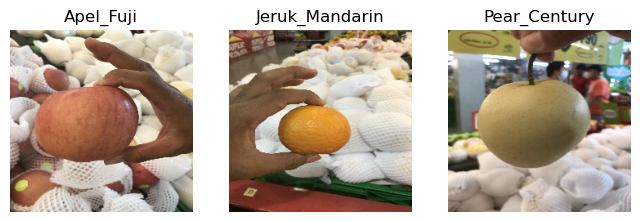

In [7]:
fruits_array_train=[]
for features,label in all_arrays:
    fruits_array_train.append(features)

location = [[1,32,48]]
fruit_names=["Apel_Fuji", "Jeruk_Mandarin", "Pear_Century"]


for i,j,k in location:
    plt.subplots(figsize=(8,8))
    plt.subplot(1,3,1)
    plt.imshow(fruits_array_train[i])
    plt.title(fruit_names[0])
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(fruits_array_train[j])
    plt.title(fruit_names[1])
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(fruits_array_train[k])
    plt.title(fruit_names[2])
    plt.axis("off")


In [8]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying

In [9]:
X_train.shape

(72, 224, 224, 3)

In [12]:
#normalization and reshaping
X_train=X_train.reshape(-1,img_size_width,img_size_height,3)
#X_train=X_train/255
X_test=X_test.reshape(-1,img_size_width,img_size_height,3)
#X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (72, 224, 224, 3)
shape of X_test=   (19, 224, 224, 3)


In [10]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=3)
Y_test=to_categorical(Y_test,num_classes=3)

In [11]:
Y_train.shape

(72, 3)

In [15]:
X_train.shape

(72, 224, 224, 3)

In [12]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=18)

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3,activation="softmax"))
#defining optimizer
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=25
batch_size=15

In [14]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           #rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.2,        #zoom in-out 5%
                           #width_shift_range=0.5, #shift 5%
                           #height_shift_range=0.5,
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history=model.fit(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/25
3/3 [==============================] - 6s 893ms/step - loss: 815.0495 - accuracy: 0.3333 - val_loss: 219.2968 - val_accuracy: 0.6667
Epoch 2/25
3/3 [==============================] - 2s 653ms/step - loss: 262.2332 - accuracy: 0.3778 - val_loss: 330.8299 - val_accuracy: 0.2667
Epoch 3/25
3/3 [==============================] - 2s 590ms/step - loss: 144.0231 - accuracy: 0.4524 - val_loss: 1.2638 - val_accuracy: 0.8000
Epoch 4/25
3/3 [==============================] - 2s 640ms/step - loss: 73.3862 - accuracy: 0.4444 - val_loss: 29.5755 - val_accuracy: 0.7333
Epoch 5/25
3/3 [==============================] - 2s 747ms/step - loss: 30.3006 - accuracy: 0.6222 - val_loss: 0.0623 - val_accuracy: 0.9333
Epoch 6/25
3/3 [==============================] - 2s 641ms/step - loss: 15.2553 - accuracy: 0.5952 - val_loss: 5.1616 - val_accuracy: 0.6000
Epoch 7/25
3/3 [==============================] - 2s 652ms/step - loss: 2.4305 - accuracy: 0.7556 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 

Text(0.5, 1.0, 'Accuracy Evolution')

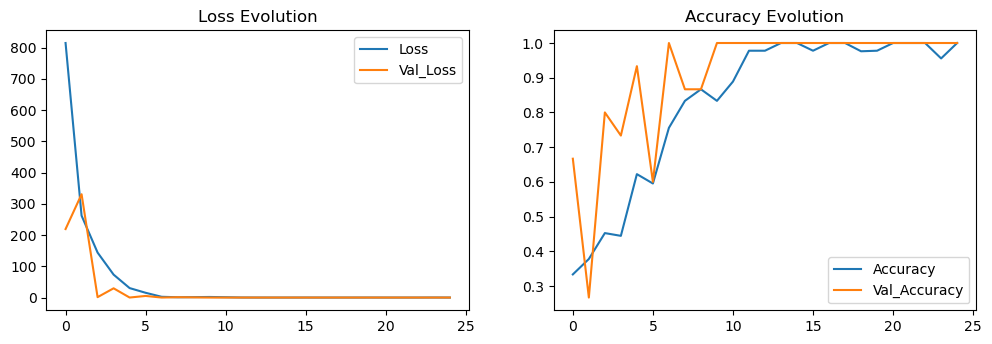

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

## Confusion Matrix untuk data testing

1/1 [==============================] - 0s 422ms/step


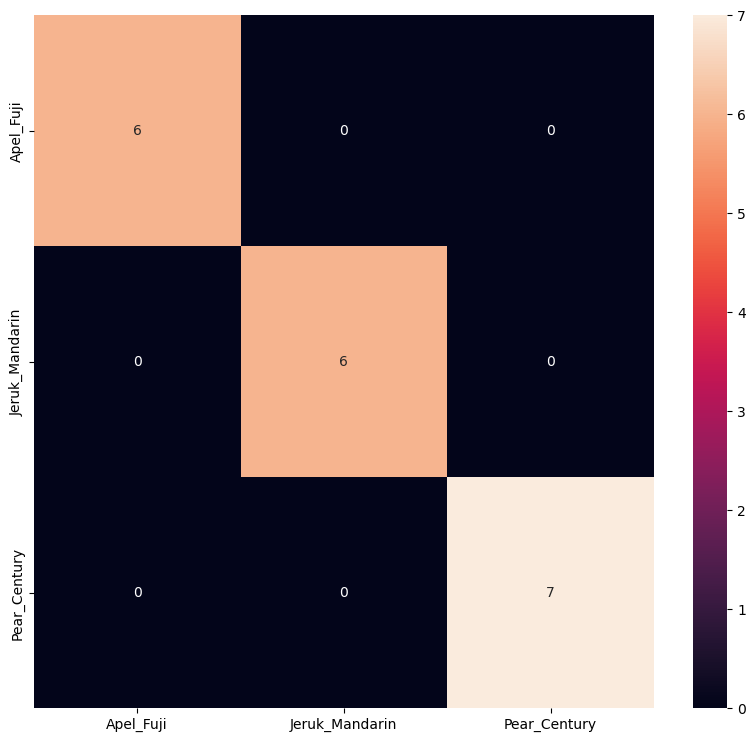

In [16]:
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

In [17]:
prediksi = model.predict(X_test)
prediksi

1/1 [==============================] - 0s 94ms/step


array([[3.4965837e-35, 9.9999994e-01, 0.0000000e+00],
       [1.0640844e-03, 1.8515742e-09, 9.9893588e-01],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 9.4571337e-14, 8.9008245e-11],
       [1.0812076e-02, 2.3875108e-08, 9.8918784e-01],
       [1.4951666e-21, 9.9999994e-01, 2.6621191e-29],
       [9.9999994e-01, 8.4421271e-33, 1.4873020e-25],
       [1.0320387e-07, 2.6688348e-18, 9.9999982e-01],
       [2.0451349e-11, 3.6501615e-18, 9.9999994e-01],
       [9.9999994e-01, 5.7982817e-28, 1.5170248e-24],
       [4.1673074e-35, 9.9999994e-01, 4.5645927e-38],
       [2.7084823e-07, 7.1751470e-14, 9.9999970e-01],
       [9.9999994e-01, 1.3495531e-16, 1.6821367e-12],
       [3.7650583e-38, 9.9999994e-01, 0.0000000e+00],
       [2.6344648e-04, 5.4591423e-12, 9.9973655e-01],
       [4.1741980e-05, 5.8938606e-14, 9.9995822e-01],
       [7.7092623e-24, 1.0000000e+00, 1.4437552e-32],
       [1.0000000e+00, 4.3988474e-22, 4.8472223e-14],
       [1.0000000e+00, 4.594

In [18]:
evaluasi = model.evaluate(X_test, Y_test)
evaluasi

1/1 [==============================] - 0s 110ms/step - loss: 6.4428e-04 - accuracy: 1.0000


[0.0006442789454013109, 1.0]

Upload an image: dataset/Test/Apel_Fuji/IMG_6036.JPG
1/1 [==============================] - 0s 289ms/step
Prediksi kelasnya adalah : Apel_Fuji
probabilitasnya : 1.0


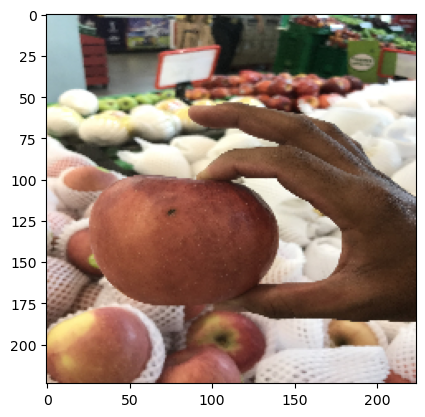

In [19]:
from tensorflow.keras.preprocessing import image
from IPython.display import display
from PIL import Image

#dataset/Test/Jeruk_Mandarin/IMG_6098.JPG
#dataset/Test/Pear_Century/IMG_6085.JPG
#dataset/Test/Apel_Fuji/IMG_6036.JPG

uploaded_file = input("Upload an image: ")
uploaded_image = image.load_img(uploaded_file, target_size=(224, 224))
rotasi = uploaded_image.rotate(-90)
image_array = np.array(rotasi).astype('float32')
input_image = np.expand_dims(image_array, axis=0)
predictions = model.predict(input_image)

gmbrplot = plt.imshow(rotasi)
classes_fruit = ["Apel_Fuji", "Jeruk_Mandarin", "Pear_Century"] #real
index_prediction = np.argmax(predictions)

print("Prediksi kelasnya adalah :",classes_fruit[index_prediction] )
print("probabilitasnya :", predictions[0][index_prediction])
#for prediction in predictions:
    #max_index = np.argmax(prediction)
    #fruit_label = classes_fruit[max_index]
    #print("Predicted fruit label:", fruit_label)
    #print("Probabilitas :", prediction[0][max])

# percobaan haar cascade dan CNN

In [21]:
cap = cv2.VideoCapture(0)
hand = cv2.CascadeClassifier('haarcascade_hand (1).xml')

while(True):
    ret,frame = cap.read()
    if not ret:
        print("Gagal membaca frame")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    hands = hand.detectMultiScale(gray, 1.1, 3,0)
    
    for (x,y,w,h) in hands:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        tangan = frame[y:y+h, x:x+w]
        image = cv2.resize(tangan, (224,224))
        image_array = np.array(image).astype('float32')
        gambar = np.expand_dims(image_array, axis=0)
        
        prediksi = model.predict(gambar)
        index_prediksi = np.argmax(prediksi)
        
        cv2.putText(frame, f'{classes_fruit[index_prediksi]}', (x, y - 20), cv2.FONT_HERSHEY_COMPLEX, 0.8, [0, 0, 255], 3)
    
    cv2.imshow('Deteksi tangan', frame)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 39ms/step
